In [9]:
import urllib3
import json
import matplotlib.pyplot as plt
import numpy as np

In [10]:
http = urllib3.PoolManager()
urlPoralApiIBGE = "https://servicodados.ibge.gov.br/api/v1/projecoes/populacao/BR"
response = http.request("GET", urlPoralApiIBGE)
print("Response Status: ", response.status)

Response Status:  200


In [11]:
data_response = response.data.decode("utf-8")
data_response

'{"localidade":"0","horario":"13/09/2022 19:47:09","projecao":{"populacao":215098655,"periodoMedio":{"incrementoPopulacional":21263,"nascimento":12000,"obito":45000}}}'

In [12]:
data_json = json.loads(data_response)
data_json

{'localidade': '0',
 'horario': '13/09/2022 19:47:09',
 'projecao': {'populacao': 215098655,
  'periodoMedio': {'incrementoPopulacional': 21263,
   'nascimento': 12000,
   'obito': 45000}}}

In [13]:
print(data_json["horario"])

13/09/2022 19:47:09


In [14]:
print(data_json["projecao"]["periodoMedio"])

{'incrementoPopulacional': 21263, 'nascimento': 12000, 'obito': 45000}


In [15]:
data_grafico = data_json["projecao"]["periodoMedio"]
data_grafico

{'incrementoPopulacional': 21263, 'nascimento': 12000, 'obito': 45000}

In [16]:
totalNascimento = data_grafico["nascimento"]
totalObito = data_grafico["obito"]
dataAtualizacao = data_json["horario"]
print(dataAtualizacao)
print(totalNascimento)
print(totalObito)

13/09/2022 19:47:09
12000
45000


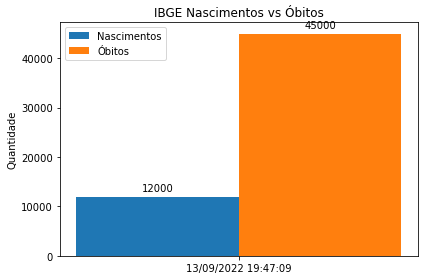

In [17]:
labels = [dataAtualizacao]
dataNascimento = [totalNascimento]
dataObito = [totalObito]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, dataNascimento, width, label='Nascimentos')
rects2 = ax.bar(x + width/2, dataObito, width, label='Óbitos')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade')
ax.set_title('IBGE Nascimentos vs Óbitos')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()